# EDA FOR Hourly Transportation Report By İstanbul Data Portal - January 2020

[DATA](https://data.ibb.gov.tr/dataset/saatlik-toplu-ulasim-veri-seti/resource/511c5034-0a1c-4c77-9831-157f30e62aee)

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('/gdrive/My Drive/1/hourly_transportation_202001.csv',parse_dates=['DATE_TIME'])
df.head()

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2020-01-29 12:00:00,2,RAY,KADIKÖY-MODA,2,AKTARMA,59,59
1,2020-01-29 10:00:00,2,RAY,TELEFERİK MAÇKA - TAŞKIŞLA,2,NORMAL,13,15
2,2020-01-04 18:00:00,2,RAY,İETT NOSTALJİK TRAMVAY,2,AKTARMA,21,21
3,2020-01-19 23:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,2874,2922
4,2020-01-04 14:00:00,1,KARAYOLU,İETT,2,AKTARMA,3584,3608


In [5]:
df.shape

(23162, 8)

In [6]:
df.columns

Index(['DATE_TIME', 'TRANSPORT_TYPE_ID', 'TRANSPORT_TYPE_DESC', 'LINE',
       'TRANSFER_TYPE_ID', 'TRANSFER_TYPE', 'NUMBER_OF_PASSENGER',
       'NUMBER_OF_PASSAGE'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            23162 non-null  datetime64[ns]
 1   TRANSPORT_TYPE_ID    23162 non-null  int64         
 2   TRANSPORT_TYPE_DESC  23162 non-null  object        
 3   LINE                 23162 non-null  object        
 4   TRANSFER_TYPE_ID     23162 non-null  int64         
 5   TRANSFER_TYPE        23162 non-null  object        
 6   NUMBER_OF_PASSENGER  23162 non-null  int64         
 7   NUMBER_OF_PASSAGE    23162 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.4+ MB


In [8]:
df.describe()

,TRANSPORT_TYPE_ID,TRANSFER_TYPE_ID,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
count,23162.000000,23162.0,23162.000000,23162.000000
mean,1.960107,2.0,7875.113332,8489.401261
std,0.521840,0.0,19154.339731,21023.525076
min,1.000000,2.0,1.000000,1.000000
25%,2.000000,2.0,150.000000,166.000000
50%,2.000000,2.0,1175.000000,1222.500000
75%,2.000000,2.0,6313.000000,6617.000000
max,3.000000,2.0,191760.000000,205449.000000


Most crowded transport.

In [9]:
df.sort_values("NUMBER_OF_PASSENGER", ascending = False).head(10)

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
13920,2020-01-02 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,191760,205449
8033,2020-01-10 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,188031,201595
23148,2020-01-03 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,187703,201104
21436,2020-01-02 07:00:00,1,KARAYOLU,ÖHO,2,NORMAL,187463,201114
6262,2020-01-09 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,187426,200290
21576,2020-01-13 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,185397,199022
17122,2020-01-13 07:00:00,1,KARAYOLU,ÖHO,2,NORMAL,183998,197415
3292,2020-01-09 07:00:00,1,KARAYOLU,ÖHO,2,NORMAL,183637,196874
944,2020-01-14 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,183582,197013
1105,2020-01-03 07:00:00,1,KARAYOLU,ÖHO,2,NORMAL,183057,196593


Marmaray line's most busy times.

In [15]:
a = df["LINE"].isin(["MARMARAY"])
df[a].sort_values("NUMBER_OF_PASSENGER", ascending=False).head(10)

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
12091,2020-01-10 18:00:00,2,RAY,MARMARAY,2,NORMAL,48578,50595
5791,2020-01-24 18:00:00,2,RAY,MARMARAY,2,NORMAL,48107,50813
10415,2020-01-29 18:00:00,2,RAY,MARMARAY,2,NORMAL,47474,49939
16447,2020-01-31 18:00:00,2,RAY,MARMARAY,2,NORMAL,47445,49969
19383,2020-01-17 18:00:00,2,RAY,MARMARAY,2,NORMAL,47121,48872
9402,2020-01-14 18:00:00,2,RAY,MARMARAY,2,NORMAL,47035,48434
20770,2020-01-22 18:00:00,2,RAY,MARMARAY,2,NORMAL,46748,49078
12237,2020-01-15 18:00:00,2,RAY,MARMARAY,2,NORMAL,46386,47924
11914,2020-01-03 18:00:00,2,RAY,MARMARAY,2,NORMAL,46358,48229
8074,2020-01-21 18:00:00,2,RAY,MARMARAY,2,NORMAL,44602,46526


Ray means rail. It shows first 10 hourly report for ray.

In [ ]:
ray = df["TRANSPORT_TYPE_DESC"].isin(["RAY"])
df[ray].head(10)

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2020-01-29 12:00:00,2,RAY,KADIKÖY-MODA,2,AKTARMA,59,59
1,2020-01-29 10:00:00,2,RAY,TELEFERİK MAÇKA - TAŞKIŞLA,2,NORMAL,13,15
2,2020-01-04 18:00:00,2,RAY,İETT NOSTALJİK TRAMVAY,2,AKTARMA,21,21
5,2020-01-28 08:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,26033,26725
7,2020-01-28 08:00:00,2,RAY,KADIKÖY-MODA,2,NORMAL,146,148
8,2020-01-29 08:00:00,2,RAY,EDİRNEKAPI-SULTANÇİFTLİĞİ,2,AKTARMA,1192,1195
9,2020-01-29 08:00:00,2,RAY,AKSARAY-HAVALİMANI,2,AKTARMA,3511,3529
10,2020-01-05 02:00:00,2,RAY,KADIKÖY-KARTAL METROSU,2,AKTARMA,66,66
11,2020-01-01 20:00:00,2,RAY,İETT TÜNEL,2,NORMAL,486,667
13,2020-01-01 14:00:00,2,RAY,KADIKÖY-KARTAL METROSU,2,AKTARMA,2624,2645


The most crowded times and number of passengers for ray transport.

In [ ]:
df[ray].sort_values("NUMBER_OF_PASSENGER", ascending = False).head(10)

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
21227,2020-01-10 18:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,58862,61831
6354,2020-01-29 18:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,57145,59882
2594,2020-01-15 18:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,57045,59193
9834,2020-01-22 18:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,56876,59675
13320,2020-01-09 18:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,56638,59079
9618,2020-01-14 18:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,56573,58704
10253,2020-01-03 18:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,56285,59314
3088,2020-01-17 18:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,56218,58813
16737,2020-01-13 18:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,55983,58221
18800,2020-01-23 18:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,55745,58388


Same for highway transportation.

In [16]:
KARAYOLU = df["TRANSPORT_TYPE_DESC"].isin(["KARAYOLU"])
df[KARAYOLU].sort_values("NUMBER_OF_PASSENGER", ascending = False).head(10)

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
13920,2020-01-02 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,191760,205449
8033,2020-01-10 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,188031,201595
23148,2020-01-03 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,187703,201104
21436,2020-01-02 07:00:00,1,KARAYOLU,ÖHO,2,NORMAL,187463,201114
6262,2020-01-09 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,187426,200290
21576,2020-01-13 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,185397,199022
17122,2020-01-13 07:00:00,1,KARAYOLU,ÖHO,2,NORMAL,183998,197415
3292,2020-01-09 07:00:00,1,KARAYOLU,ÖHO,2,NORMAL,183637,196874
944,2020-01-14 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,183582,197013
1105,2020-01-03 07:00:00,1,KARAYOLU,ÖHO,2,NORMAL,183057,196593


Same for sea transportation.

In [17]:
DENİZ = df["TRANSPORT_TYPE_DESC"].isin(["DENİZ"])
df[DENİZ].sort_values("NUMBER_OF_PASSENGER", ascending = False).head(10)

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
19523,2020-01-24 18:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,10650,11483
11620,2020-01-31 18:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,10556,11319
20,2020-01-22 18:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,10488,11422
18713,2020-01-10 18:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,10464,11062
15647,2020-01-03 18:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,10128,10696
6850,2020-01-30 18:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,10009,10716
12313,2020-01-14 18:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,9959,10455
74,2020-01-27 18:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,9925,10709
11535,2020-01-31 17:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,9890,10853
267,2020-01-27 17:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,9888,10819


Number of passengers reported by transport type.

In [ ]:
df.groupby("TRANSPORT_TYPE_DESC")["NUMBER_OF_PASSENGER"].sum()

TRANSPORT_TYPE_DESC
DENİZ         5369252
KARAYOLU    109157880
RAY          67876243
Name: NUMBER_OF_PASSENGER, dtype: int64

Mean of number of passengers reported by transport type.

In [ ]:
df.groupby("TRANSPORT_TYPE_DESC")["NUMBER_OF_PASSENGER"].mean()

TRANSPORT_TYPE_DESC
DENİZ        1981.273801
KARAYOLU    30037.941662
RAY          4035.928351
Name: NUMBER_OF_PASSENGER, dtype: float64

Sum of number of passengers by LINE column values.

In [ ]:
df.groupby("LINE")["NUMBER_OF_PASSENGER"].sum()

LINE
AKSARAY-HAVALİMANI            11016547
EDİRNEKAPI-SULTANÇİFTLİĞİ      4848987
KABATAŞ-BAĞCILAR              10349862
KABATAŞ-MAHMUTBEY                   99
KADIKÖY-KARTAL METROSU         7252239
KADIKÖY-MODA                     98919
KİRAZLI-OLİMPİYATKÖY           1372328
LEVENT - RUMELİ HİSARÜSTÜ       495505
MARMARAY                      11952856
METROBÜS                      23804501
MOTOR TEKNE                    3043512
TAKSİM-4.LEVENT               13618391
TAKSİM-KABATAŞ FUNİKULERİ       395638
TELEFERİK EYÜP PİYERLOTİ         58720
TELEFERİK MAÇKA - TAŞKIŞLA       16546
ÖHO                           62578670
ÜSKÜDAR ÇEKMEKÖY METROSU       6019867
İETT                          22774709
İETT NOSTALJİK TRAMVAY           23988
İETT TÜNEL                      355751
ŞEHİR HATLARI                  2325740
Name: NUMBER_OF_PASSENGER, dtype: int64

In [ ]:
toplam = df.groupby("LINE")["NUMBER_OF_PASSENGER"].sum()
toplam  = toplam.head(10)
toplam.sort_values(ascending=False)

LINE
METROBÜS                     23804501
MARMARAY                     11952856
AKSARAY-HAVALİMANI           11016547
KABATAŞ-BAĞCILAR             10349862
KADIKÖY-KARTAL METROSU        7252239
EDİRNEKAPI-SULTANÇİFTLİĞİ     4848987
KİRAZLI-OLİMPİYATKÖY          1372328
LEVENT - RUMELİ HİSARÜSTÜ      495505
KADIKÖY-MODA                    98919
KABATAŞ-MAHMUTBEY                  99
Name: NUMBER_OF_PASSENGER, dtype: int64

In [ ]:
df.groupby("TRANSPORT_TYPE_DESC")["NUMBER_OF_PASSENGER"].sum()

TRANSPORT_TYPE_DESC
DENİZ         5369252
KARAYOLU    109157880
RAY          67876243
Name: NUMBER_OF_PASSENGER, dtype: int64

Pie chart of transport types usage.

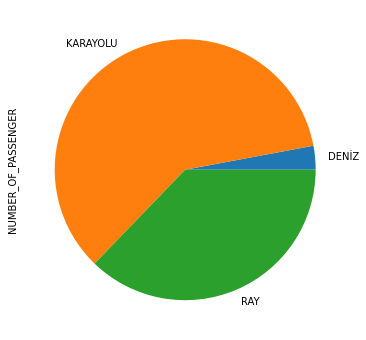

In [ ]:
df.groupby("TRANSPORT_TYPE_DESC")["NUMBER_OF_PASSENGER"].sum().plot(kind='pie', figsize=(6,6))

Weekly usage of different transport type.

1.   DENİZ = SEA
2.   KARAYOLU = HIGHWAY
3.   RAY = RAIL

In [ ]:
ck = df.groupby(['TRANSPORT_TYPE_DESC', pd.Grouper(key='DATE_TIME', freq='W-MON')])['NUMBER_OF_PASSENGER'].sum().reset_index().sort_values('DATE_TIME')
print(ck)

   TRANSPORT_TYPE_DESC  DATE_TIME  NUMBER_OF_PASSENGER
0                DENİZ 2020-01-06               903134
5             KARAYOLU 2020-01-06             19396541
10                 RAY 2020-01-06             12027867
1                DENİZ 2020-01-13              1110753
6             KARAYOLU 2020-01-13             25615601
11                 RAY 2020-01-13             15613683
2                DENİZ 2020-01-20              1222221
7             KARAYOLU 2020-01-20             25597820
12                 RAY 2020-01-20             15821225
3                DENİZ 2020-01-27              1340026
8             KARAYOLU 2020-01-27             23915703
13                 RAY 2020-01-27             15252381
4                DENİZ 2020-02-03               793118
9             KARAYOLU 2020-02-03             14632215
14                 RAY 2020-02-03              9161087
